###  Implement bilateral filter and apply it to sky.png and noir.png.

In [23]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [24]:
i1 = './A2_resources/sky.png'
i2 = './A2_resources/noir.png'

img1 = cv2.imread(i1)
img2 = cv2.imread(i2)

In [25]:
def gauss2D(shape,sigma):
    m,n = [(ss-1)/2 for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    
    return h

In [26]:
def bfunc(i,j,fw,fh,image,sigma_b, sigma_g, domainFilter):
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    rangeFilter = ((imgwork - image[i, j,:])**2 )/(2*(sigma_b**2))
    
    bilateralFilter = np.exp(-1*rangeFilter)*domainFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

In [27]:
def bilateralFilterConv(image, fw,fh, sigma_b, sigma_g):
    size = image.shape
    
    domain = gauss2D((fw,fh), sigma_g)
    
    id = 0
    if image.shape[2] == 1:
        id = 1
        domainFilter = np.resize(domain,(*domain.shape,1))
    else:
        domainFilter = np.stack([domain, domain, domain], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma_b, sigma_g, domainFilter)
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

In [28]:
img3 = bilateralFilterConv(img1, 5, 5, 0.5, 1)
img4 = bilateralFilterConv(img2, 5, 5, 0.7, 0.9)

b1, g1, r1 = cv2.split(img1)
img1 = cv2.merge((r1,g1,b1))

b2, g2, r2 = cv2.split(img2)
img2 = cv2.merge((r2,g2,b2))

b3, g3, r3 = cv2.split(img3)
img3 = cv2.merge((r3,g3,b3))

b4, g4, r4 = cv2.split(img4)
img4 = cv2.merge((r4,g4,b4))

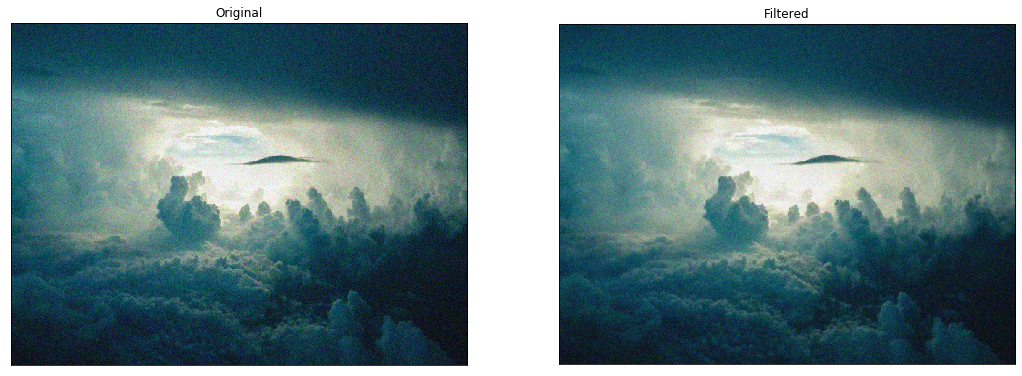

In [29]:
fig = plt.figure(figsize=[18, 18])
plt.subplot(121),plt.imshow(img1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3)
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

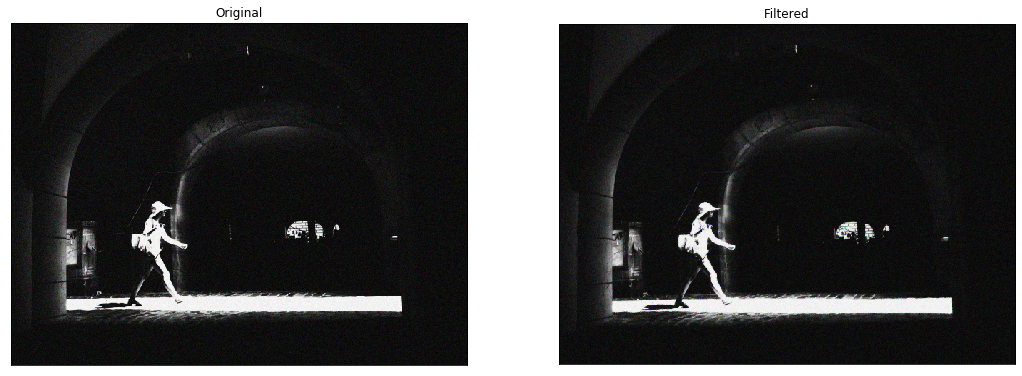

In [30]:
fig = plt.figure(figsize=[18, 18])
plt.subplot(121),plt.imshow(img2)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img4)
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

###  Vary the effect of domain and range components of the bilateral filter and try to minimize the L2 distance from the ground truth images. Display the images and the approximate values for the sigma.

In [79]:
def err_func(img1, sigma_b, sigma_g):
    img3 = bilateralFilterConv(img1, 5, 5, sigma_b, sigma_g)
    
    b1, g1, r1 = cv2.split(img1)
    img1 = cv2.merge((r1,g1,b1))
    
    b3, g3, r3 = cv2.split(img3)
    img3 = cv2.merge((r3,g3,b3))
    
#     error = np.linalg.norm(img1[img3.shape[0],img3.shape[1],0]-img3[:,:,0]) \
#         + np.linalg.norm(img1[img3.shape[0],img3.shape[1],1]-img3[:,:,1]) \
#         + np.linalg.norm(img1[img3.shape[0],img3.shape[1],2]-img3[:,:,2])   

    error = np.sqrt(np.sum(((img1[img3.shape[0],img3.shape[1],:].astype('float')-img3.astype('float'))**2)))
    
#     fig.suptitle('This is a somewhat long figure title', fontsize=16)
    fig = plt.figure(figsize=[10, 10])
    plt.subplot(121),plt.imshow(img1)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img3)
    plt.title('Filtered'), plt.xticks([]), plt.yticks([])
    fig.suptitle('Sigma_b={}, Sigma_g={}, L2error={}'.format(sigma_b,sigma_g,error), fontsize=16)
    plt.show()
    

In [80]:
# dist1 = np.linalg.norm(img1[img3.shape[0],img3.shape[1],0]-img3[:,:,0]) + np.linalg.norm(img1[img3.shape[0],img3.shape[1],1]-img3[:,:,1]) + np.linalg.norm(img1[img3.shape[0],img3.shape[1],2]-img3[:,:,2])

In [81]:
# dist2 = np.linalg.norm(img2[img4.shape[0],img4.shape[1],0]-img4[:,:,0]) + np.linalg.norm(img2[img4.shape[0],img4.shape[1],1]-img4[:,:,1]) + np.linalg.norm(img2[img4.shape[0],img4.shape[1],2]-img4[:,:,2])

In [82]:
i1 = './A2_resources/sky.png'
i2 = './A2_resources/noir.png'

img1 = cv2.imread(i1)
img2 = cv2.imread(i2)

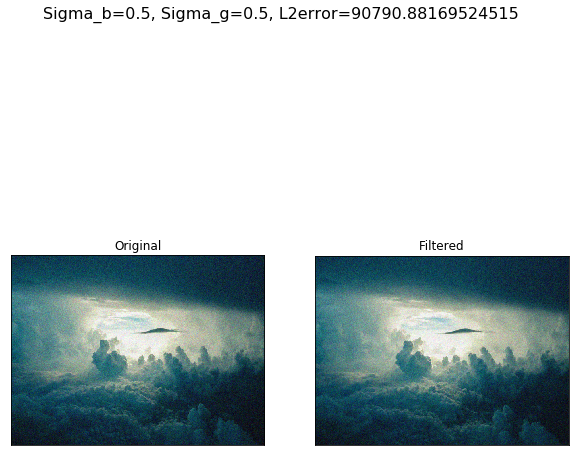

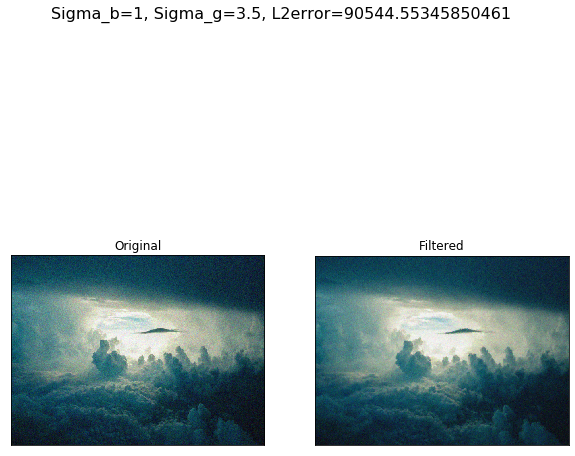

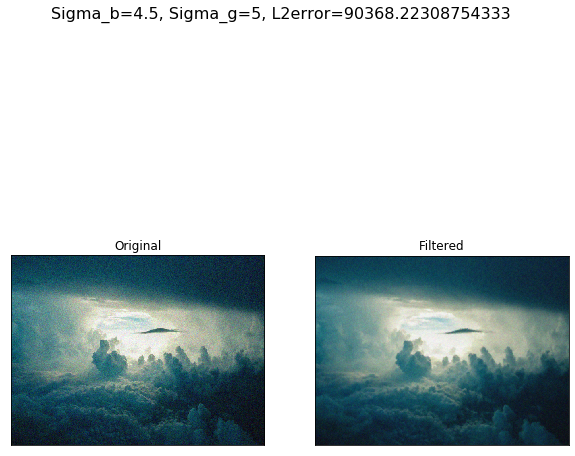

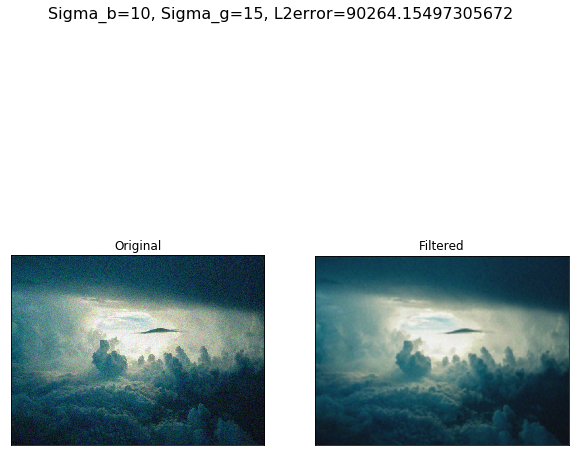

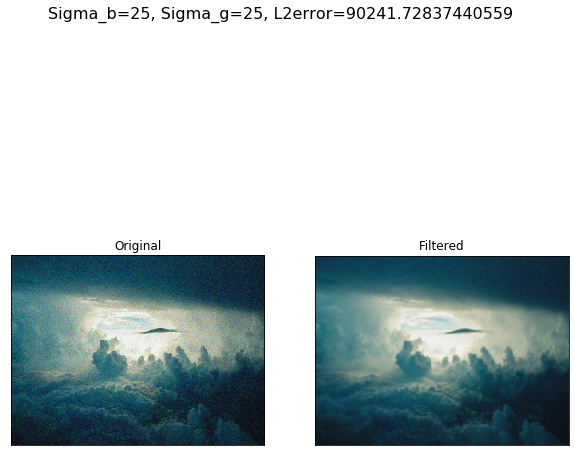

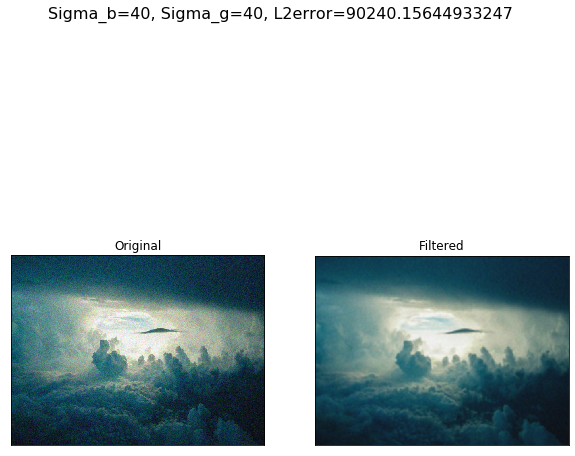

In [83]:
err_func(img1, 0.5, 0.5)
err_func(img1, 1, 3.5)
err_func(img1, 4.5, 5)
err_func(img1, 10, 15)
err_func(img1, 25, 25)
err_func(img1, 40, 40)


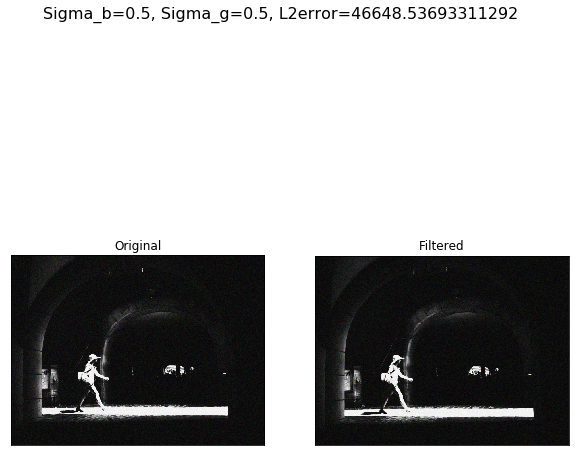

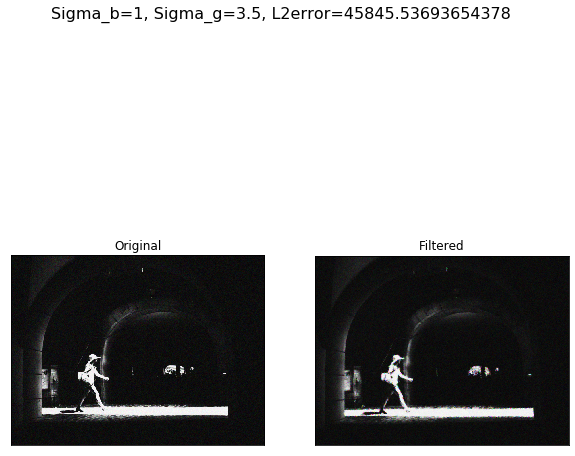

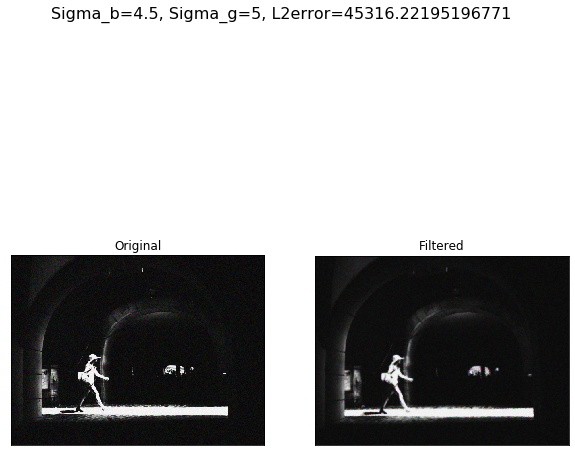

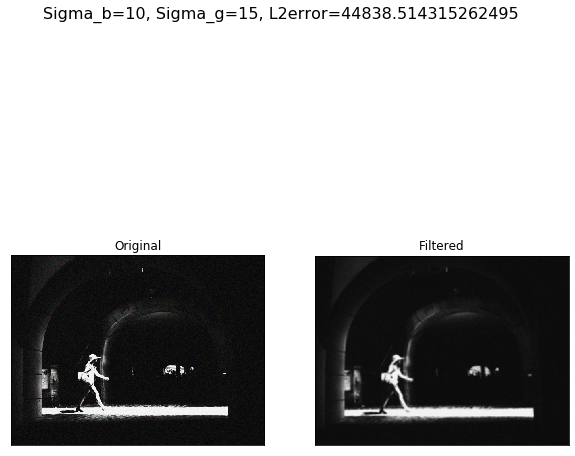

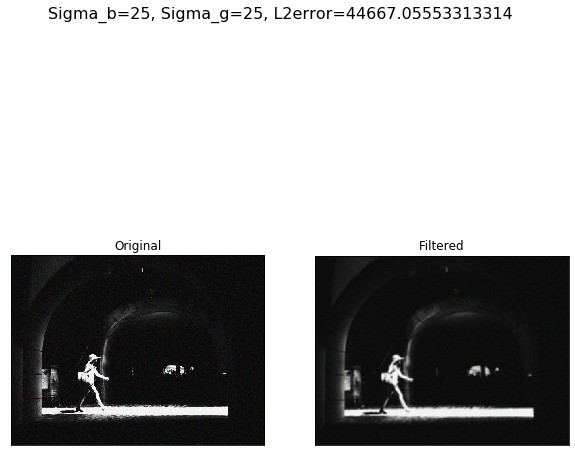

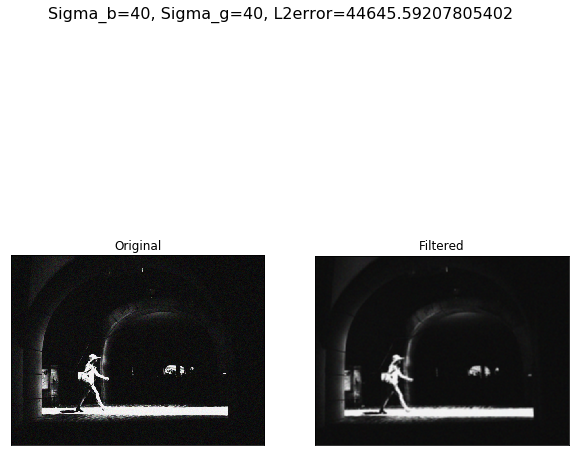

In [84]:
err_func(img2, 0.5, 0.5)
err_func(img2, 1, 3.5)
err_func(img2, 4.5, 5)
err_func(img2, 10, 15)
err_func(img2, 25, 25)
err_func(img2, 40, 40)


- It makes sense to develop an inverse bilateral filter, which blurs an image at edges and preserves the homogeneous regions because this is the behaviour that is expected of us and one of the possible applications is blurring the face of people or blurring something specific.